In [2]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
results = pd.read_csv('gender_submission.csv')
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [8]:
train.drop(['PassengerId','Cabin','Ticket','Name'], axis=1, inplace = True)

In [9]:
test.drop(['PassengerId','Cabin','Ticket','Name'], axis=1, inplace = True)

In [10]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [12]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
train['Sex']=train['Sex'].replace({'male':0, 'female':1})
train['Embarked']=train['Embarked'].replace({'S':0,'Q':1,'C':2})

In [15]:
test['Sex']=test['Sex'].replace({'male':0, 'female':1})
test['Embarked']=test['Embarked'].replace({'S':0,'Q':1,'C':2})
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [16]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [18]:
# Add another field FamilyMem representing sum of parents and siblings on the boat
train['FamilyMem'] = train['SibSp']+train['Parch']
test['FamilyMem'] = test['SibSp']+train['Parch']

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        714 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   889 non-null    float64
 8   FamilyMem  891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [32]:
from sklearn.preprocessing import MinMaxScaler
# normalizing data to be able to use KNN Imputation for imputing missing values
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train),columns=train.columns)
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMem
0,0.0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.1
1,1.0,0.0,1.0,0.472229,0.125,0.0,0.139136,1.0,0.1
2,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0
3,1.0,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0,0.1
4,0.0,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0


In [33]:
from sklearn.preprocessing import MinMaxScaler
# normalizing data to be able to use KNN Imputation for imputing missing values
scaler = MinMaxScaler()
test = pd.DataFrame(scaler.fit_transform(test),columns=test.columns)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMem
0,1.0,0.0,0.452723,0.000,0.000000,0.015282,0.5,0.000000
1,1.0,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.083333
2,0.5,0.0,0.815377,0.000,0.000000,0.018909,0.5,0.000000
3,1.0,0.0,0.353818,0.000,0.000000,0.016908,0.0,0.000000
4,1.0,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.083333


In [34]:
from sklearn.impute import KNNImputer
# now we can impute missing values using KNN algorithm

imputer = KNNImputer(n_neighbors=5)
train = pd.DataFrame(imputer.fit_transform(train),columns=train.columns)

In [35]:
from sklearn.impute import KNNImputer
# now we can impute missing values using KNN algorithm

imputer = KNNImputer(n_neighbors=5)
test = pd.DataFrame(imputer.fit_transform(test),columns=test.columns)

In [36]:
test.isna().any()

Pclass       False
Sex          False
Age          False
SibSp        False
Parch        False
Fare         False
Embarked     False
FamilyMem    False
dtype: bool

In [37]:
train.isna().any()

Survived     False
Pclass       False
Sex          False
Age          False
SibSp        False
Parch        False
Fare         False
Embarked     False
FamilyMem    False
dtype: bool

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

<AxesSubplot:>

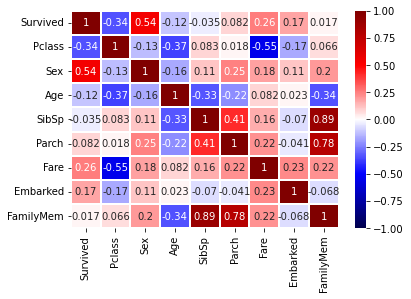

In [57]:
correlation = train.corr()
sns.heatmap(train.corr(),vmin=-1,vmax=1,cmap='seismic',linewidths=0.2,annot=True)

In [98]:
# implementing logistical regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

X_train = train.drop('Survived',axis=1)
y_train = train['Survived']
X_test = test.copy()
y_test = results['Survived']
logreg = LogisticRegression('l2')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)


0.9521531100478469

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(results['Survived'],y_pred)
print(confusion_matrix)

[[254  12]
 [  8 144]]


In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

